In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv("data/custom/DATA_ANNOTATED.csv")

O                535455
B-PER             15278
B-LOC             11890
B-DATE             8638
I-DATE             7518
B-ORG              7237
I-ORG              6497
I-PER              6372
I-LOC              5733
B-CARDINAL         5654
B-TIME             3006
I-TIME             2899
I-WORK_OF_ART      2613
I-EVENT            1968
B-ORDINAL          1659
B-WORK_OF_ART      1335
B-NORP             1314
B-EVENT            1188
I-QUANTITY          763
B-PRODUCT           645
B-QUANTITY          546
I-PRODUCT           323
I-CARDINAL          308
I-MONEY             133
B-MONEY             108
B-LANGUAGE           71
I-NORP               69
B-LAW                24
I-LAW                23
I-PERCENT            20
B-PERCENT            18
Name: Tag, dtype: int64


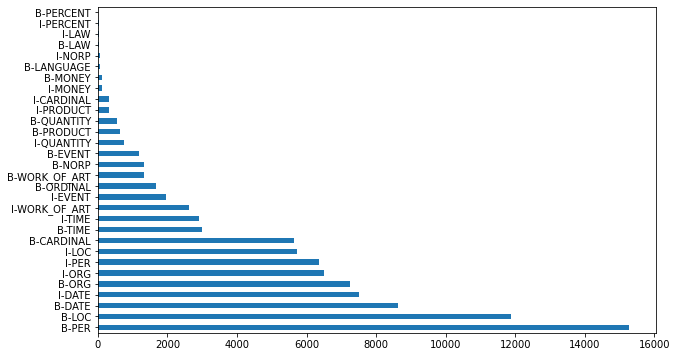

In [3]:
print(data.Tag.value_counts())

print("=" * 80)

plt.figure(figsize = (10, 6))
data[data.Tag != 'O']\
    .Tag\
    .value_counts()\
    .plot\
    .barh();

In [4]:
df = data.groupby('Tag')['Word']

In [5]:
data_df = {}

for index in data.Tag.unique():
    data_df[index] = data.Word[data.Tag == index].unique()

In [6]:
data = pd.read_csv("data/custom/DATA_PROCESSADO.csv")

In [8]:
data.head()

,text,text_lower
0,Long over due !! and lizzo was fire AF omg !!!,long over due !! and lizzo was fire af omg !!!
1,Another Bachour Class at bachour1234 with pavo...,another bachour class at bachour1234 with pavo...
2,Always happy to be here need to move here forever,always happy to be here need to move here forever
3,Morning love it up North this morning First Wa...,morning love it up north this morning first wa...
4,What are your flaws that only God can anoint a...,what are your flaws that only god can anoint a...


In [55]:
from flair.data import Sentence
from flair.models import SequenceTagger

In [56]:
tagger = SequenceTagger.load('ner')

2021-04-11 17:04:05,334 --------------------------------------------------------------------------------
2021-04-11 17:04:05,335 The model key 'ner' now maps to 'https://huggingface.co/flair/ner-english' on the HuggingFace ModelHub
2021-04-11 17:04:05,335  - The most current version of the model is automatically downloaded from there.
2021-04-11 17:04:05,336  - (you can alternatively manually download the original model at https://nlp.informatik.hu-berlin.de/resources/models/ner/en-ner-conll03-v0.4.pt)
2021-04-11 17:04:05,337 --------------------------------------------------------------------------------
2021-04-11 17:04:06,029 loading file /home/mpgxc/.flair/models/ner-english/4f4cdab26f24cb98b732b389e6cebc646c36f54cfd6e0b7d3b90b25656e4262f.8baa8ae8795f4df80b28e7f7b61d788ecbb057d1dc85aacb316f1bd02837a4a4


In [115]:
def flair_annotate(text, tagger):
    
    sentence = Sentence(text)

    tagger.predict(sentence)

    entity_dict = sentence.to_dict(tag_type='ner')

    for entity in entity_dict['entities']:

        words = entity["text"].split()
        [label] = entity["labels"]
        

        size_words = len(words)

        for word_index, word in enumerate(words):   

            if size_words == 1:
                tag = 'S-' + label.value

            elif size_words > 1:                 
                tag = 'B-' + label.value          
                
            if  word_index > 0 and word_index <= size_words:
                tag = 'I-' + label.value
                
            if word_index == (size_words - 1) and tag.startswith('I'):
                tag = 'E-' + label.value
            
            print(word, tag, tags.score)

        print('-'* 40)

In [116]:
for text in data.text[:10]:
    flair_annotate(text, tagger)

Palm B-LOC 0.6600651939709982
Beach E-LOC 0.6600651939709982
----------------------------------------
God S-PER 0.6600651939709982
----------------------------------------
Coral B-LOC 0.6600651939709982
Springs E-LOC 0.6600651939709982
----------------------------------------
Florida S-LOC 0.6600651939709982
----------------------------------------
DANIEL B-PER 0.6600651939709982
JOHNSTONJAN E-PER 0.6600651939709982
----------------------------------------
Kekito's B-PER 0.6600651939709982
Head E-PER 0.6600651939709982
----------------------------------------
Daniel B-PER 0.6600651939709982
Johnston E-PER 0.6600651939709982
----------------------------------------
Yip B-MISC 0.6600651939709982
Jump I-MISC 0.6600651939709982
musik E-MISC 0.6600651939709982
----------------------------------------
National B-ORG 0.6600651939709982
Awnings I-ORG 0.6600651939709982
LLC E-ORG 0.6600651939709982
----------------------------------------
Gamer B-MISC 0.6600651939709982
Tournament I-MISC 0.6600